# Analysis: 20250611

In [6]:
from cdk.analysis.cytosol import platereader as pr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [2]:
data, platemap = pr.load_platereader_data("./data/20250611-cytation3-pure-timecourse-gfp-ppk-mg-sweep-biotek-cdk.txt", "20250611-Mg-sweep-platemap.csv")

# Basic Plots

## Kinetics 
Kinetic time traces of every well on the plate

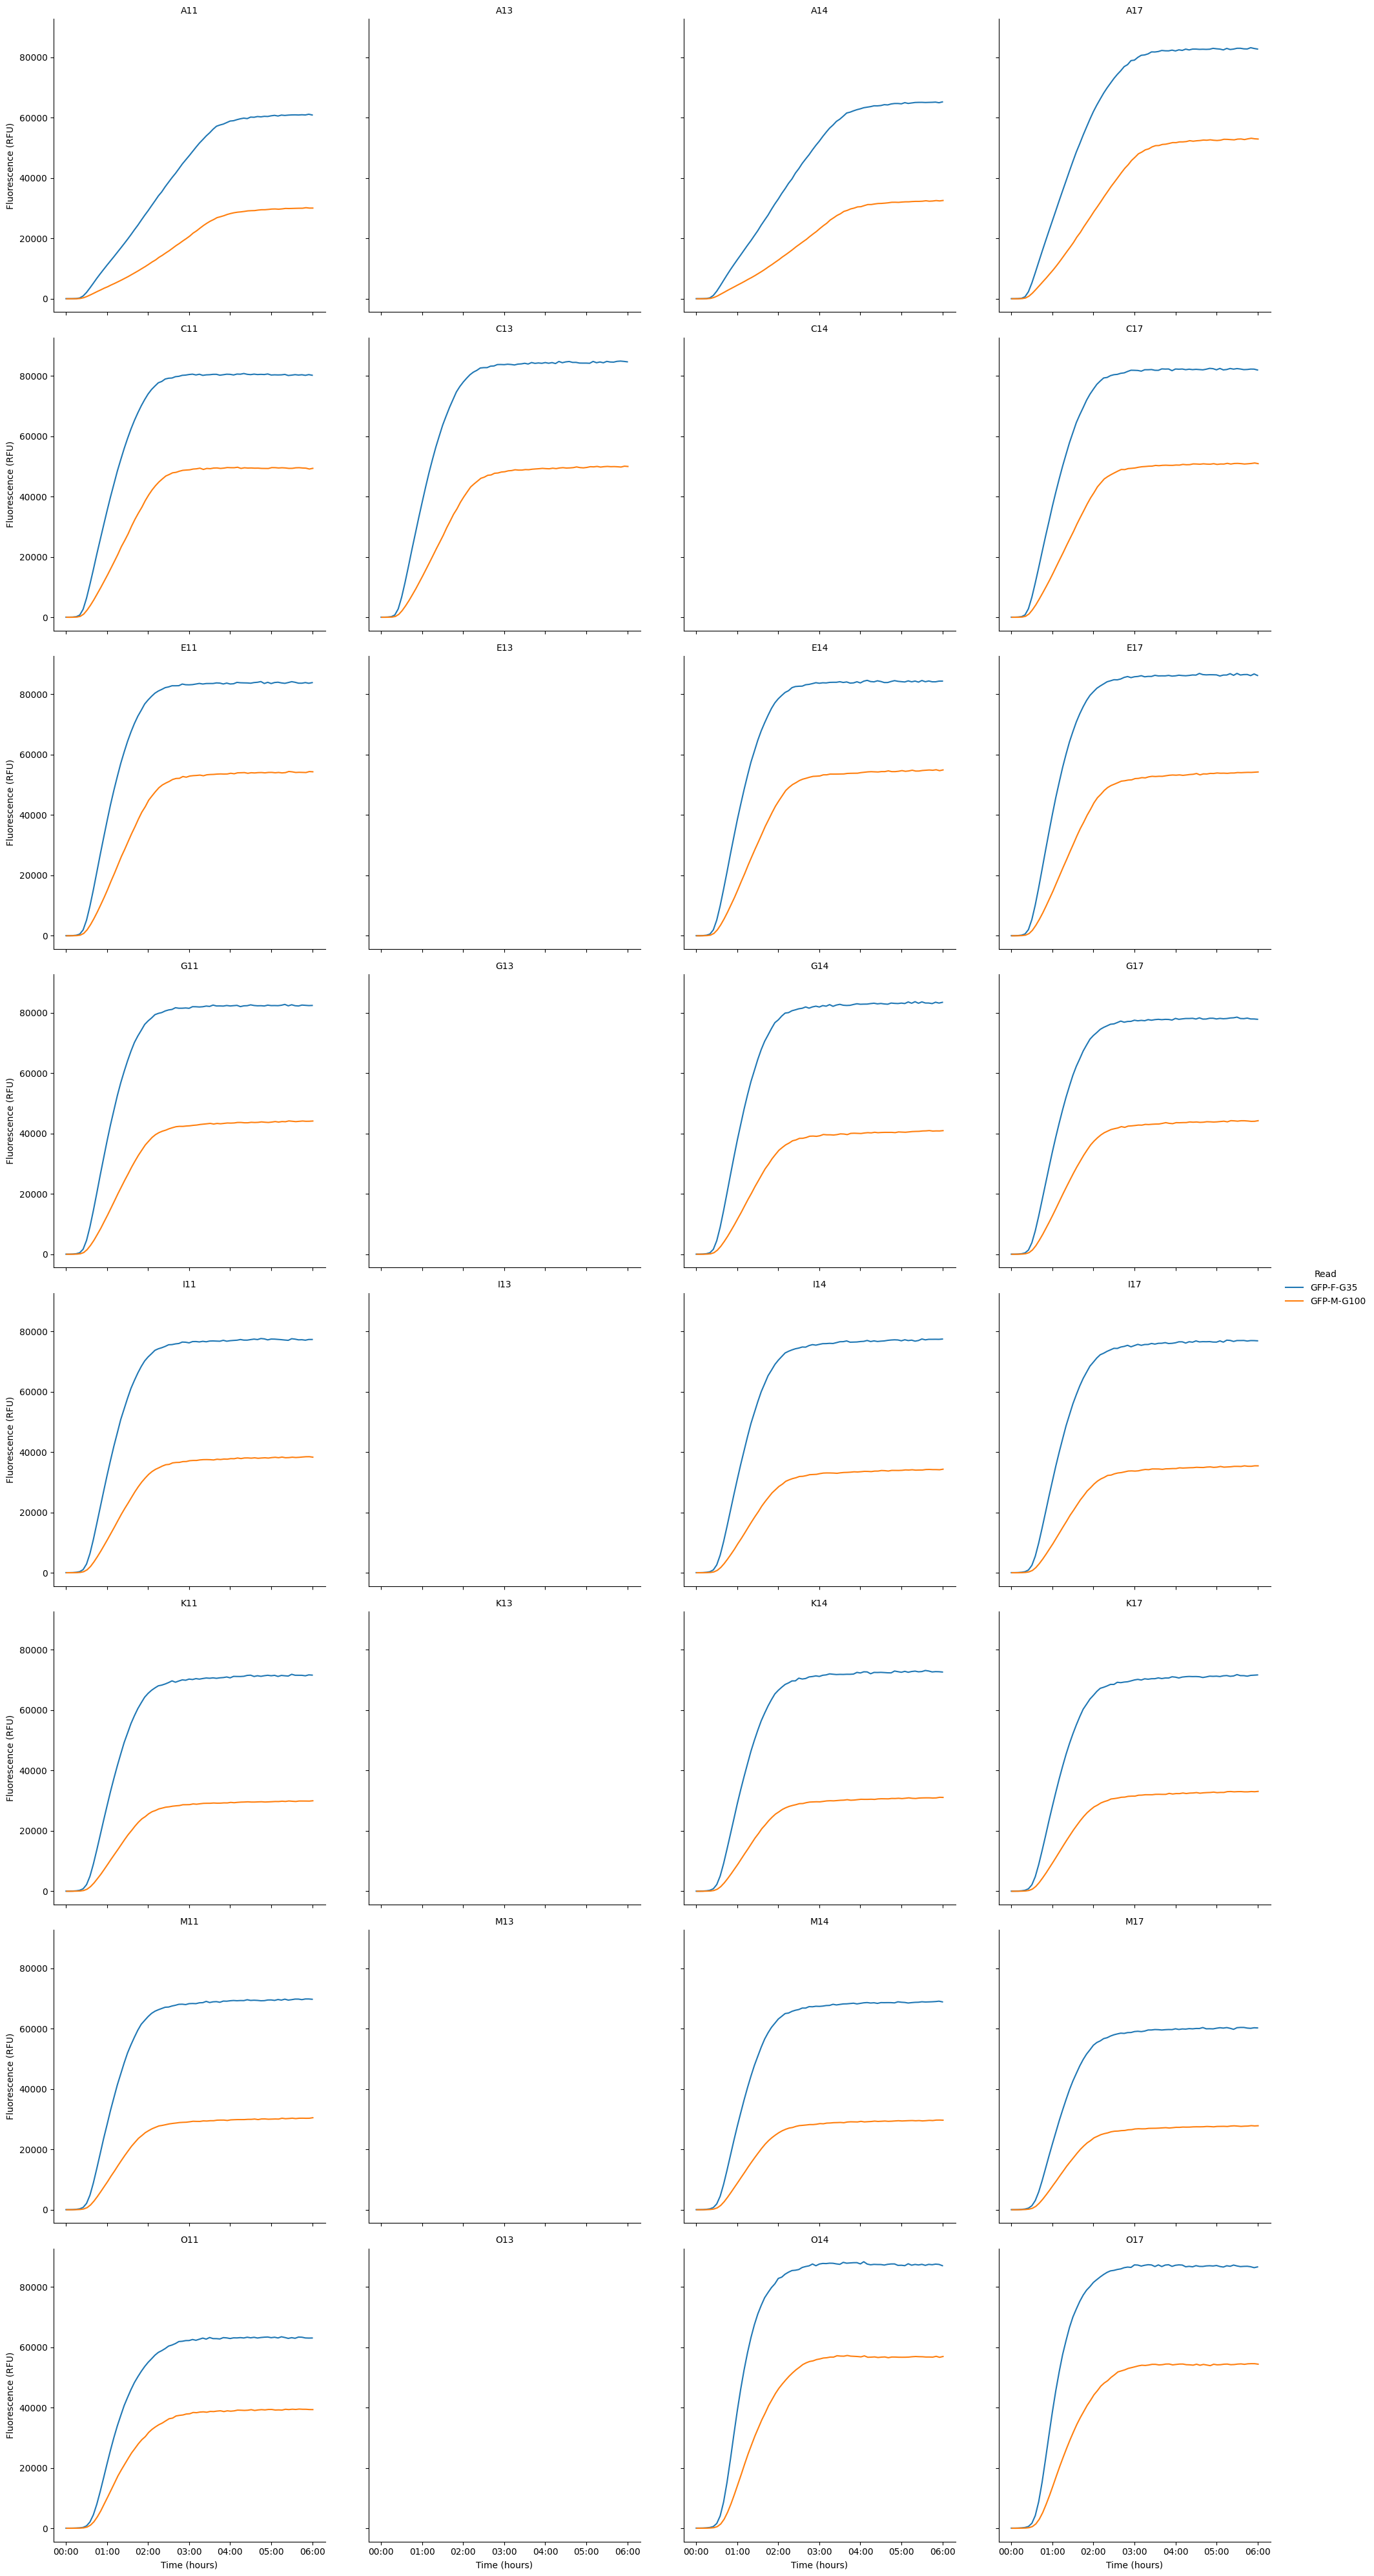

In [3]:
pr.plot_plate(data)

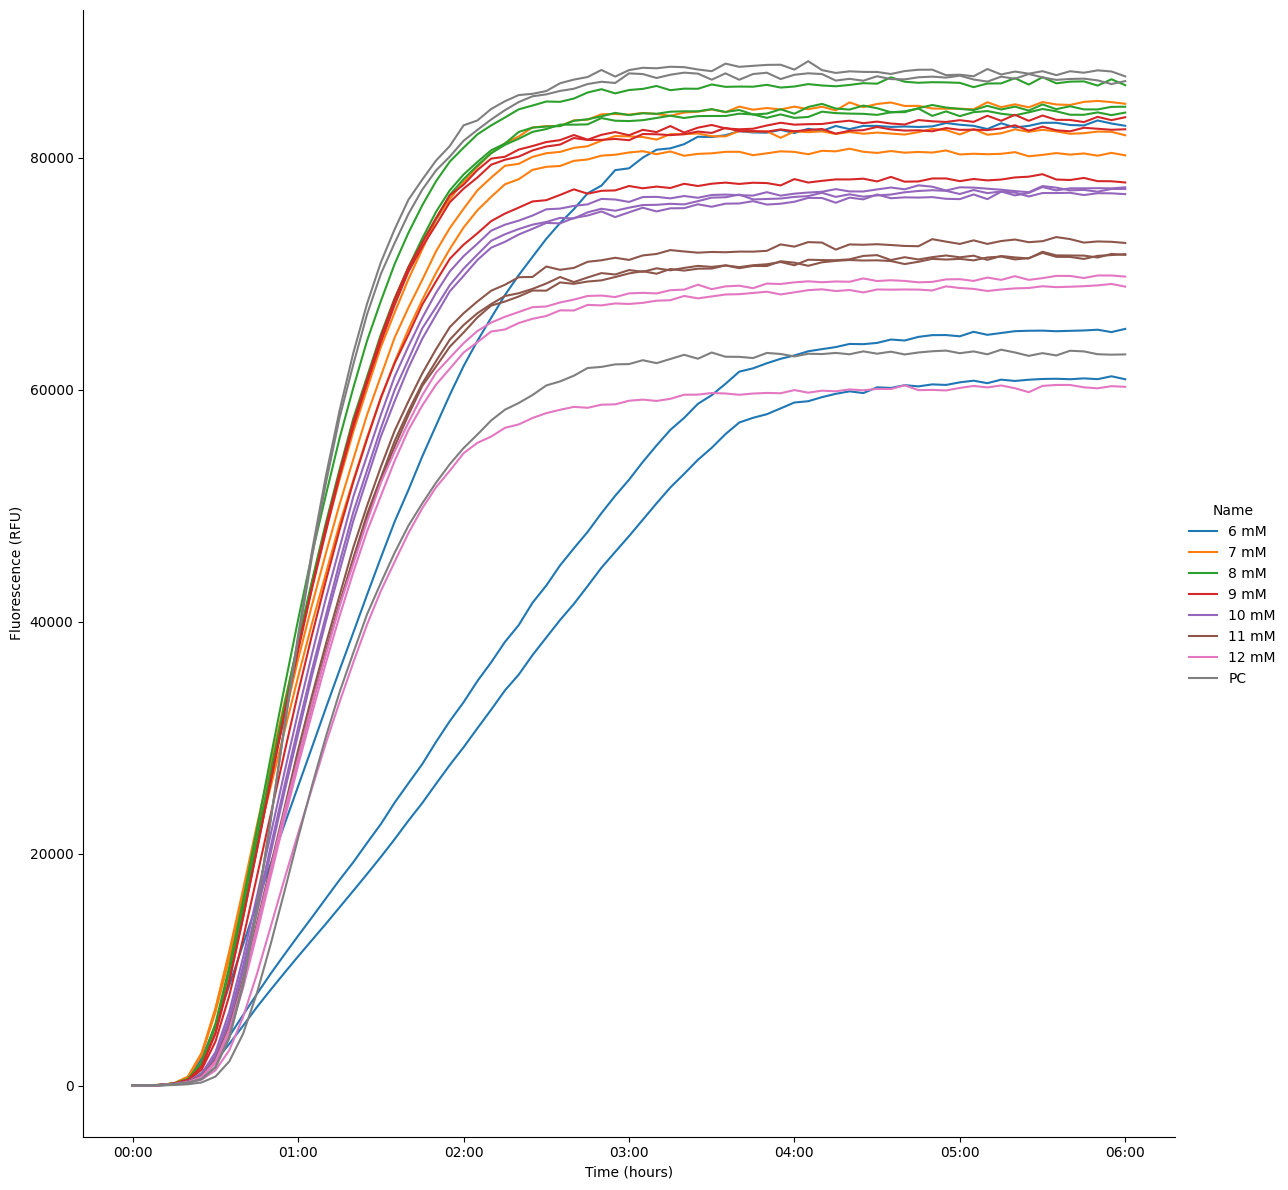

In [4]:
pr.plot_curves(data[data["Read"]=="GFP-F-G35"], units="Well", estimator=None, height=12)

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

<Axes: xlabel='Name', ylabel='Data_steadystate'>

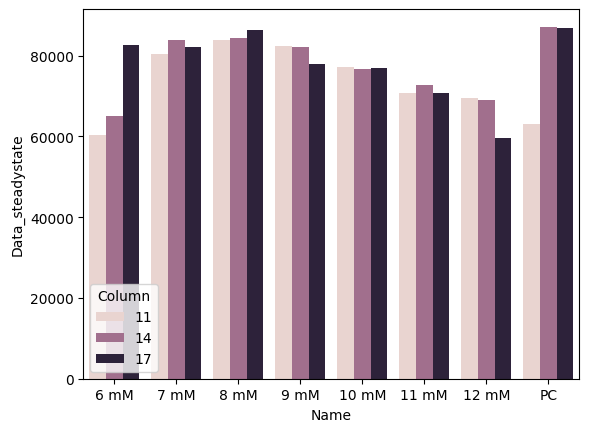

In [39]:
steadystate = data.merge(pr.find_steady_state(data[data["Read"]=="GFP-F-G35"]).reset_index(), on="Well", how="left")
steadystate.loc[steadystate["Column"]==13, "Column"] = 14
sns.barplot(data=steadystate, x="Name", y="Data_steadystate", hue="Column")

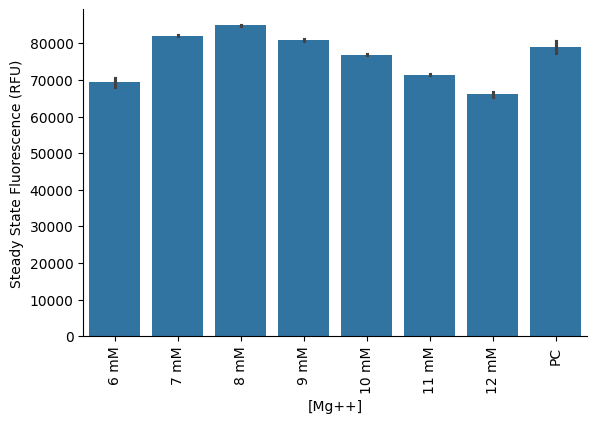

In [7]:
#| label: fig:endpoint-exp2

s= pr.plot_steadystate(data[data["Read"]=="GFP-F-G35"])
plt.xlabel("[Mg++]")
s.savefig("plot3")

# Kinetics Analysis
These functions calculate key kinetic parameters of the time series.

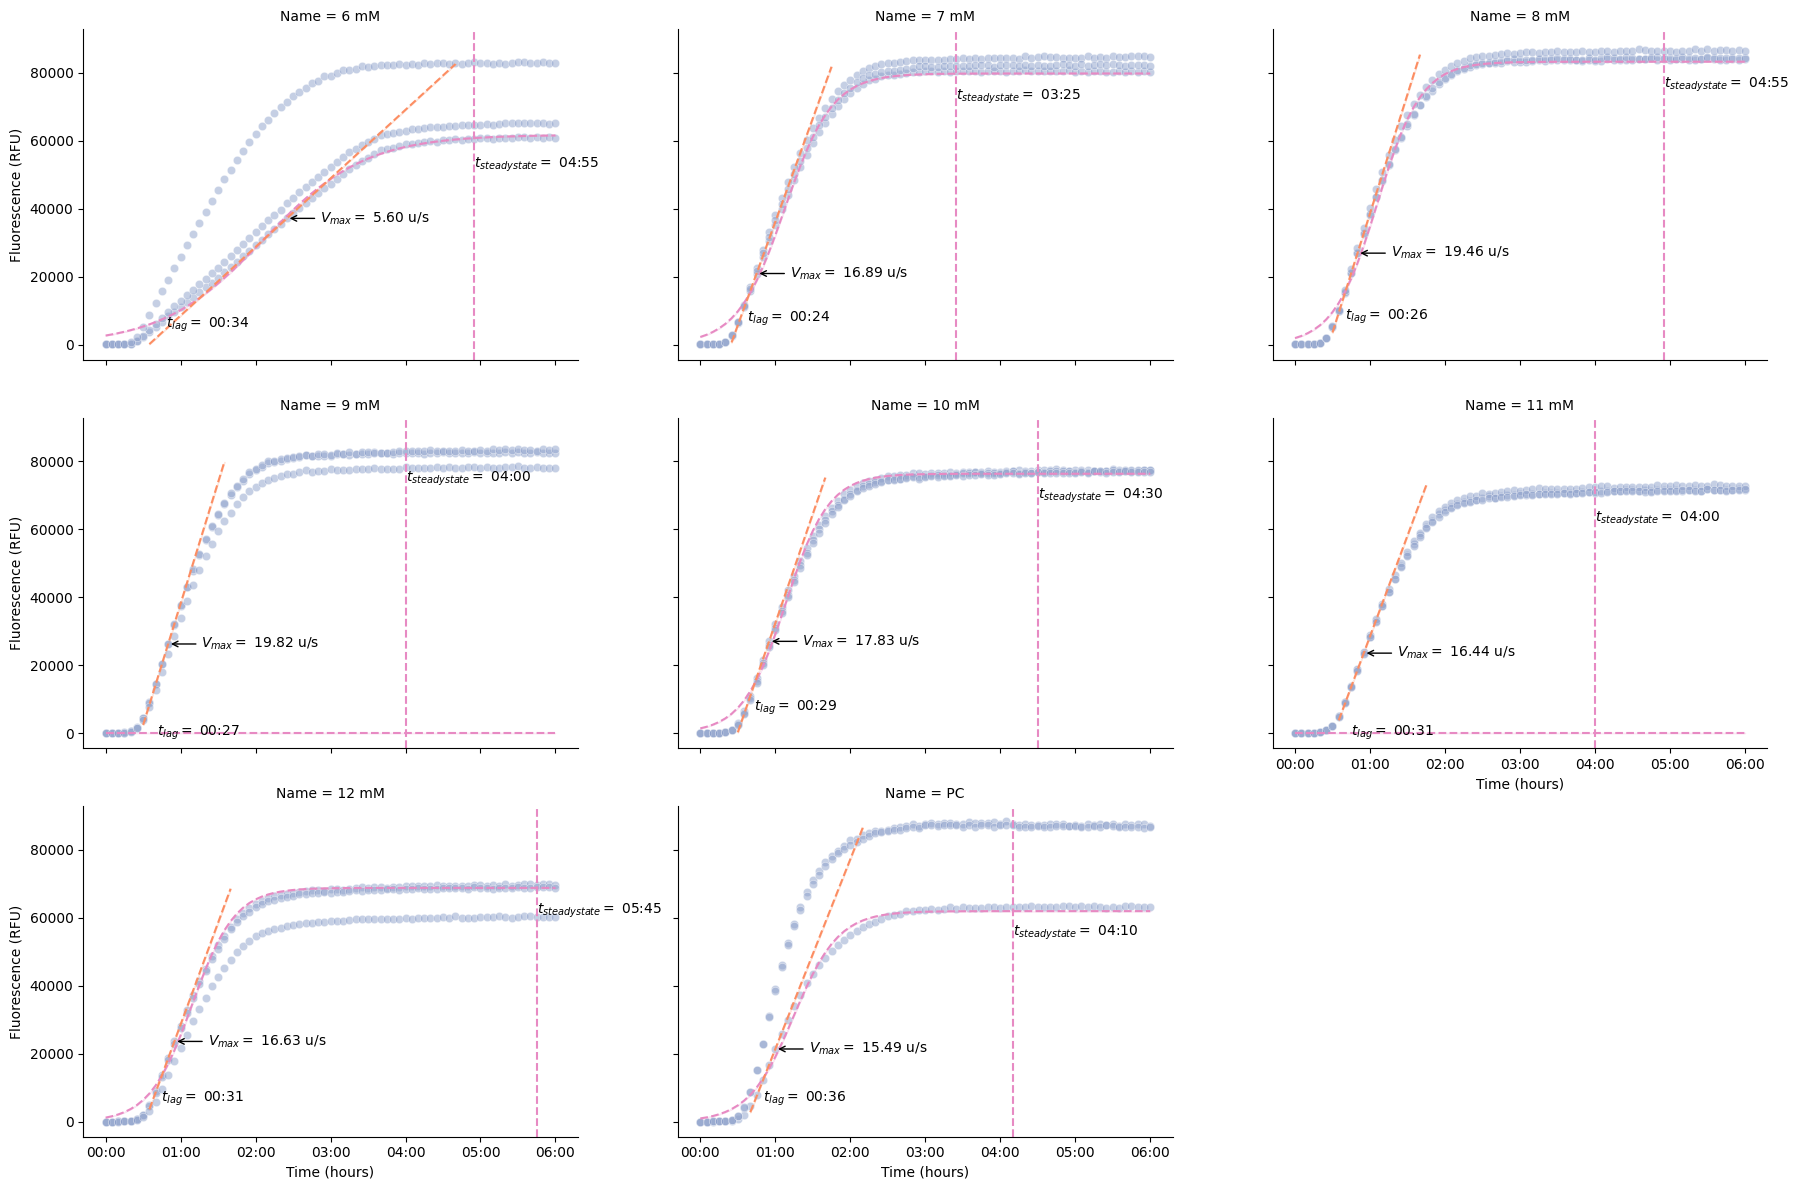

In [22]:
pr.plot_kinetics(data[data["Read"] == "GFP-F-G35"])

We can also calculate the kinetics and display the parameters as a table.

In [25]:
pr.kinetic_analysis(data)

Velocity              \
                                            Time   Data  Max   
Well Name          Read                                        
B1   pT7-deGFP 100 485/20,528/20 0 days 00:05:00   6.00 0.02   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:15:00  28.00 0.04   
B3   pT7-deGFP 20  485/20,528/20 0 days 00:05:00   6.00 0.02   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:35:00 220.00 0.17   
B5   pT7-deGFP 5   485/20,528/20 0 days 00:05:00   6.00 0.02   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:15:00  19.00 0.03   
B7   pT7-deGFP 1   485/20,528/20 0 days 00:05:00   5.00 0.01   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:50:00 156.00 0.08   

                                                       Lag        \
                                                      Time  Data   
Well Name          Read                                            
B1   pT7-deGFP 100 485/20,528/20         -1 days +23:59:00  0.00   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:04:13.846153846  0.00   
B3   pT7-deGFP 20  485/20,528/20         -1 days +23:59:00  0.00   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:13:25.882352941  0.00   
B5   pT7-deGFP 5   485/20,528/20         -1 days +23:59:00  0.00   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:04:26.666666667 13.38   
B7   pT7-deGFP 1   485/20,528/20         -1 days +23:58:45  0.00   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:16:05.217391304  0.00   

                                    Steady State           Fit               
                                            Time   Data      L    k      x0  
Well Name          Read                                                      
B1   pT7-deGFP 100 485/20,528/20 0 days 00:25:00   6.00   0.00 0.00    0.00  
B2   pT7-deGFP 50  485/20,528/20 0 days 02:40:00 132.00   0.00 0.00    0.00  
B3   pT7-deGFP 20  485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B4   pT7-deGFP 10  485/20,528/20 0 days 02:45:00 679.00   0.00 0.00    0.00  
B5   pT7-deGFP 5   485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B6   pT7-deGFP 2   485/20,528/20 0 days 02:35:00 108.00 106.53 0.00 2482.26  
B7   pT7-deGFP 1   485/20,528/20 0 days 00:20:00   5.00   0.00 0.00    0.00  
B8   pT7-deGFP 0   485/20,528/20 0 days 02:30:00 310.00   0.00 0.00    0.00